In [1]:

from qiskit import QuantumCircuit , QuantumRegister , ClassicalRegister , transpile
from qiskit . visualization import *
from qiskit_aer import AerSimulator
from matplotlib import pyplot as plt

In [2]:
def controlled_Z ( circuit , control , target ):
#Implement a Z gate with a single control
    circuit.h(target)
    circuit.cx(control, target)
    circuit.h(target)

A new cell containing the phase oracle for targeting the state |11⟩ in phase_oracle() function

In [3]:
def phase_oracle ( circuit , registers ):
# Call function that implements CZ gate
    controlled_Z( circuit , registers[0] , registers[1])

In [4]:
def grover_diffusion ( circuit , registers ) :
    # Apply Hadamard and X gates on all qubits
    circuit.h(registers)
    circuit.x(registers)
    
    # Create a barrier that isolates different sections of the circuit
    circuit.barrier()
    
    # Apply CZ gate with target as qubit 1
    controlled_Z( circuit , registers[0] , registers[1])
    circuit.barrier()
    circuit.x(registers)
    circuit.h(registers)

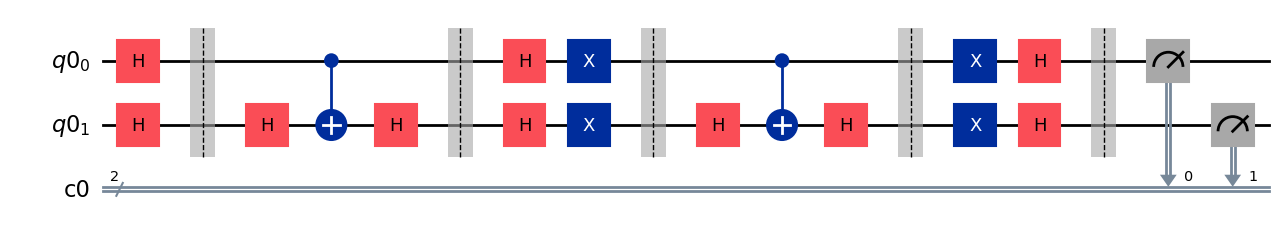

In [5]:
# Define circuit constants
Qubits = 2
tests = 1

# Define register objects
qr = QuantumRegister(Qubits)
cr = ClassicalRegister(Qubits)
groverCircuit = QuantumCircuit(qr,cr)

# Initialize circuit with Hadamard gates
groverCircuit.h(qr)

# Run phase oracle and diffusion operators .
# Can be run multiple times depending on the variable , tests .
for test in range (0 , tests ):
    groverCircuit.barrier()
    phase_oracle(groverCircuit,qr)
    groverCircuit.barrier()
    grover_diffusion(groverCircuit,qr)
# Measure quantum registers
groverCircuit.barrier()
groverCircuit.measure(qr , cr )

# Draw Circuit
fig = groverCircuit.draw(output="mpl")
display(fig)
plt.close(fig)  # prevent figures from stacking up

Main - Transpile and run the circuit on the aer simulator and plot the distribution.

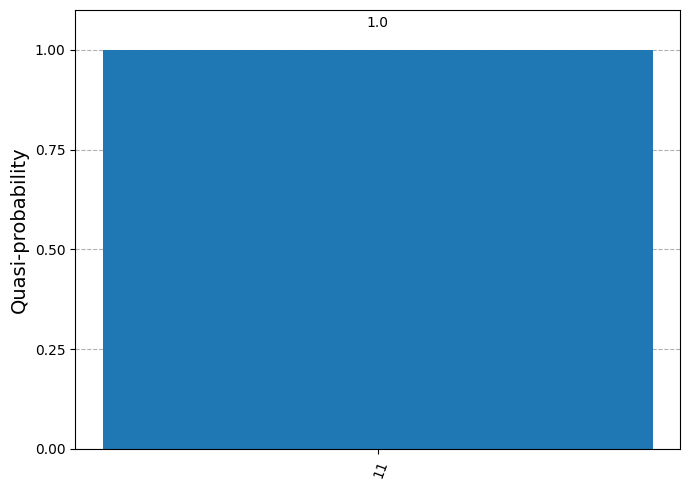

In [6]:
# Define backend that will simulate quantum circuit
aer_sim = AerSimulator()

# Transpile the circuit to work on the AerSimulator
grovers_aer = transpile(groverCircuit,backend = aer_sim )

# Run the transpiled circuit on the simulator
result = aer_sim.run(grovers_aer).result()
counts = result.get_counts()

# Plot the distribution
plot_distribution(counts)

Three oracles that target the remaining statess |00⟩, |10⟩, |01⟩. 

Target 0:


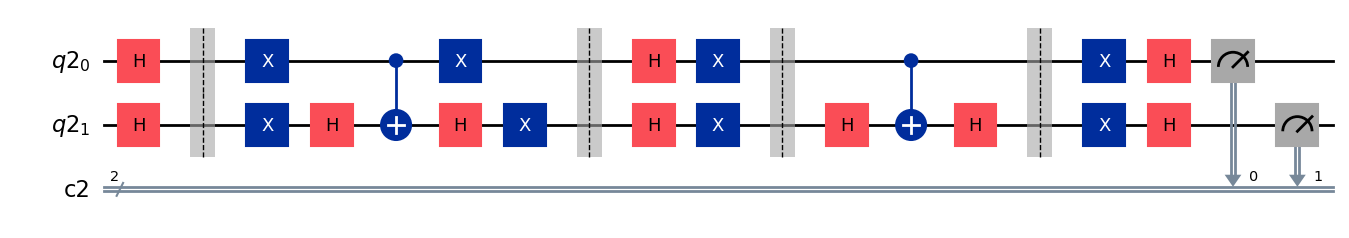

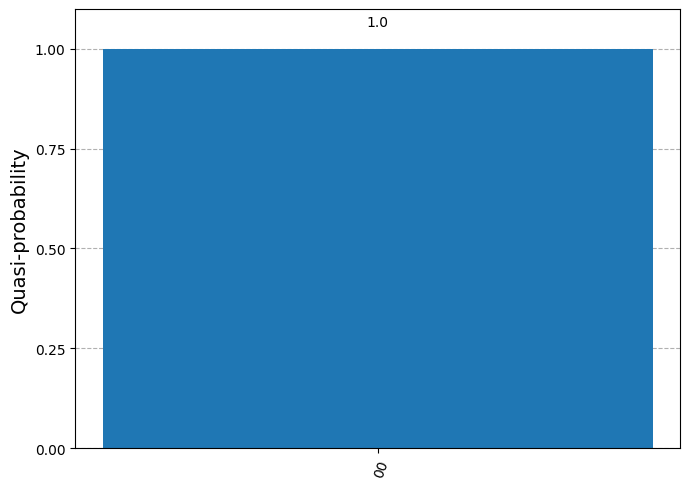

Target 1:


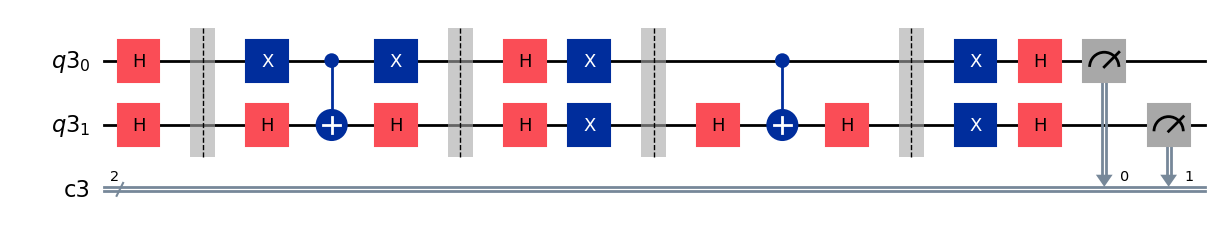

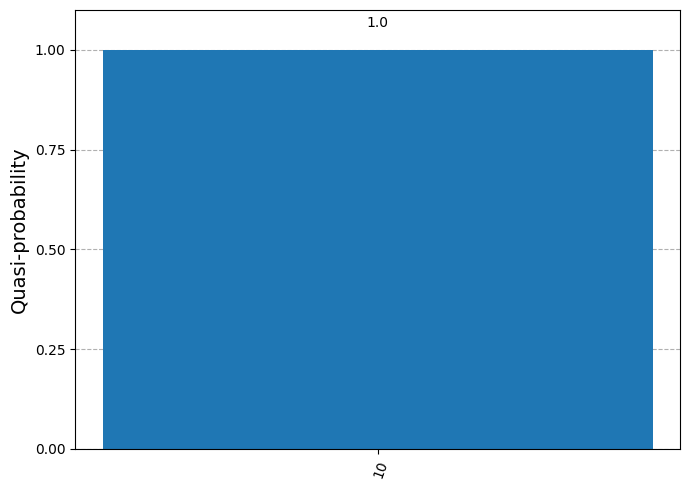

Target 2:


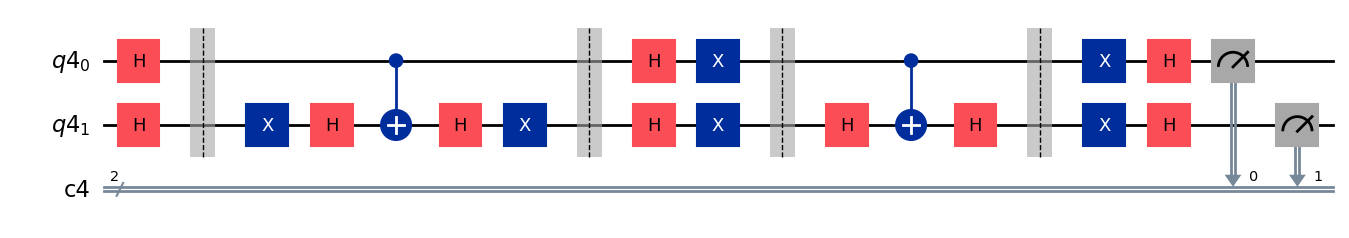

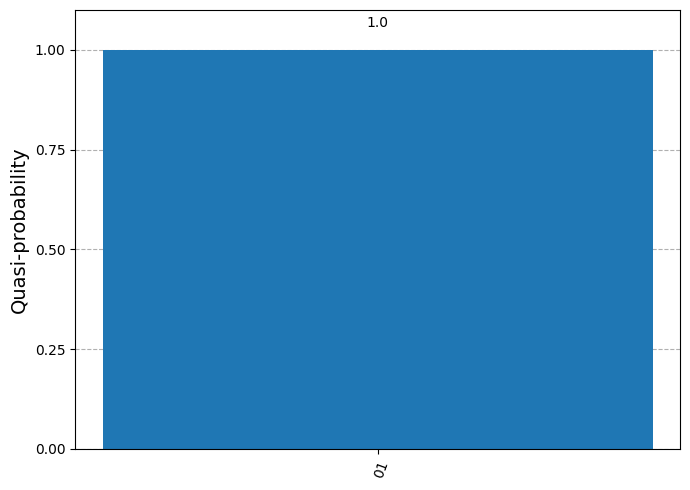

In [8]:
# Define circuit constants
Qubits = 2
tests = 3
for test in range(tests):
    qr1 = QuantumRegister(Qubits)
    cr1 = ClassicalRegister(Qubits)
    
    groverCircuit1 = QuantumCircuit(qr1, cr1)
    groverCircuit1.h(qr1)

    groverCircuit1.barrier()
    print(f"Target {test}:")
    if test == 0:  # |00⟩
        groverCircuit1.x(qr1[0]); groverCircuit1.x(qr1[1])
        phase_oracle(groverCircuit1, qr1)
        groverCircuit1.x(qr1[0]); groverCircuit1.x(qr1[1])
    elif test == 1:  # |01⟩
        groverCircuit1.x(qr1[0])
        phase_oracle(groverCircuit1, qr1)
        groverCircuit1.x(qr1[0])
    else:  # |10⟩
        groverCircuit1.x(qr1[1])
        phase_oracle(groverCircuit1, qr1)
        groverCircuit1.x(qr1[1])

    groverCircuit1.barrier()
    grover_diffusion(groverCircuit1, qr1)
    groverCircuit1.measure(qr1, cr1)

    # Explicit display
    fig = groverCircuit1.draw(output="mpl")
    display(fig)
    plt.close(fig)  # prevent figures from stacking up


    aer_sim1 = AerSimulator()

    grovers_aer1 = transpile(groverCircuit1,backend = aer_sim1 )

    # Run the transpiled circuit on the simulator
    result = aer_sim1.run(grovers_aer1).result()
    counts = result.get_counts()

    # Plot the distribution
    hist = plot_distribution(counts)
    display(hist)
    plt.close(hist)